# Multiyear flux and seasonal averaging

In [2]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )

# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")


/home/greg/data/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
data_path = '~/data/current/NMEG_utils/processed_data/daily_aflx/'
fig_path = '../figures/multiyear_figs/'
# Years to load
start = 2007
end = 2015
sites = ['Seg', 'Ses', 'Sen', 'Wjs', 'Mpj', 'Mpg', 'Vcp', 'Vcm']
# Fill a dict with multiyear dataframes for each site in sites
daily = { x : 
         ld.load_local_file( data_path + 'US-' + x + '_daily_aflx.csv')
         for x in sites }
d = pd.Panel(daily)

Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Seg_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Ses_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Sen_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Wjs_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Mpj_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Mpg_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Vcp_daily_aflx.csv
Parsing ~/data/current/NMEG_utils/processed_data/daily_aflx/US-Vcm_daily_aflx.csv


In [70]:
d.Seg.columns

Index(['GPP_g_int', 'RECO_g_int', 'FC_F_g_int', 'ET_mm_24hint_0', 'P_F_sum',
       'TA_F_avg', 'RH_F_avg', 'SW_IN_F_avg', 'RNET_F_avg', 'VPD_F_avg',
       'PAR_avg', 'LE_F_avg', 'H_F_avg', 'TA_F_min', 'VPD_F_min', 'TA_F_max',
       'VPD_F_max', 'ET_mm_dayint', 'PET_mm_dayint'],
      dtype='object')

## Plot flux timeseries

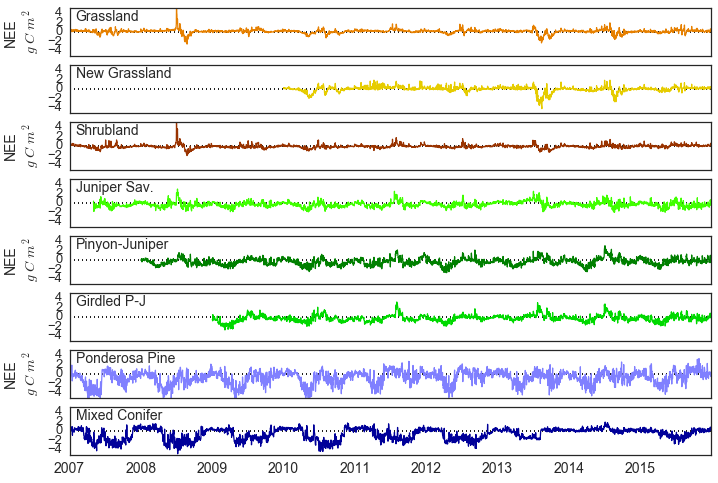

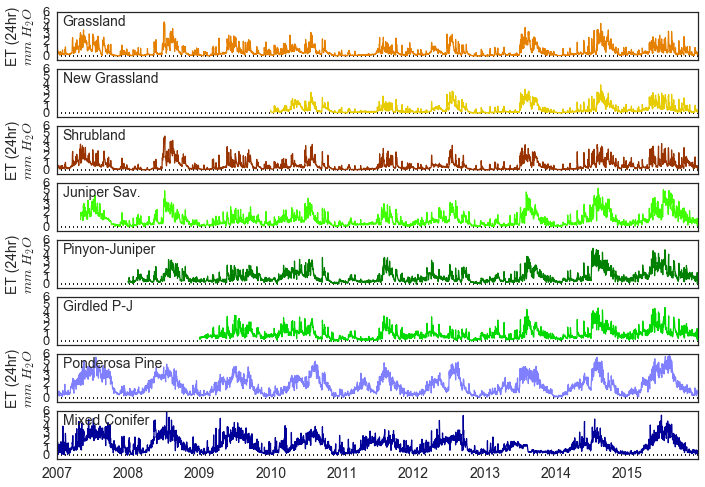

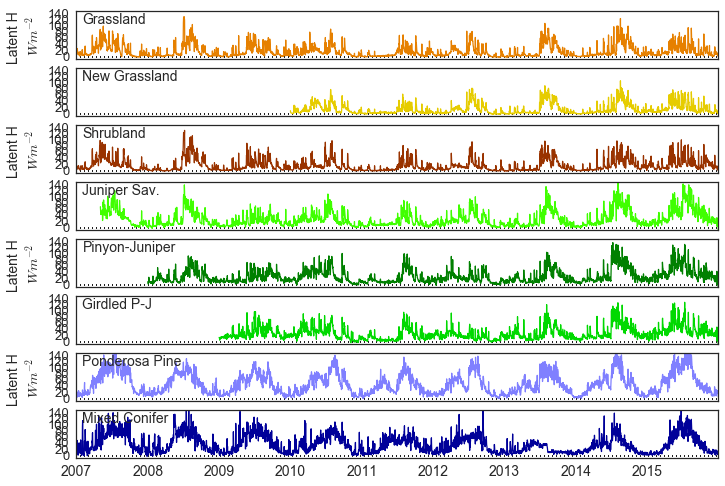

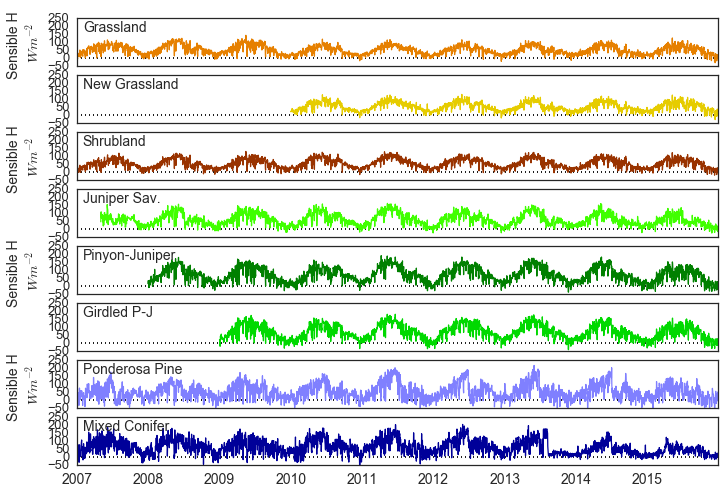

In [71]:
ylims = [ -5, 5 ]
fig1 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'FC_F_g_int', 2.4, fig1, 'NEE\n$g\ C\ m^2$', ylims=ylims)

ylims = [ -.5, 6 ]
fig2 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'ET_mm_24hint_0', 4.2, fig2, 'ET (24hr)\n$mm\ H_2O$', ylims=ylims)

ylims = [ -5, 150 ]
fig3 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'LE_F_avg', 110, fig3, 'Latent H \n$Wm^{-2}$', ylims=ylims)

ylims = [ -50, 250 ]
fig4 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, 'H_F_avg', 170, fig4, 'Sensible H \n$Wm^{-2}$', ylims=ylims)

#plt.show()
fig1.savefig( fig_path + 'NMEG_daily_FC.svg')
fig1.savefig( fig_path + 'NMEG_daily_FC.png', dpi=200)

## Plot partitioned C timeseries

* GPP is negative

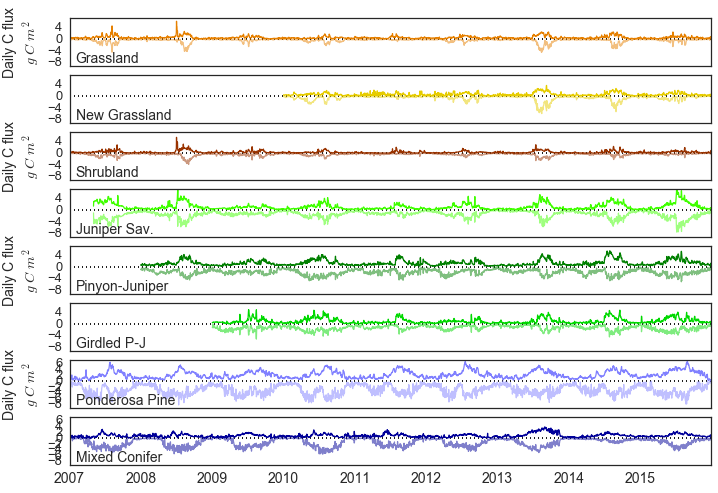

In [72]:
ylims = [ -9, 7 ]

fig5 = plt.figure(figsize=( 11.5, 8 ), dpi=150, facecolor='w', edgecolor='k')
ax = nmegplt.plot_tseries( d, ['RECO_g_int', 'GPP_g_int'], -8, fig5, 'Daily C flux\n$g\ C\ m^2$', ylims=ylims)
for j in range(0,6):
    ax[j].yaxis.set_ticks(np.arange(-8, 6, 4))

#plt.show()
fig5.savefig( fig_path + 'NMEG_daily_part.svg')
fig5.savefig( fig_path + 'NMEG_daily_part.png', dpi=200)

## Calculate multi-year statistics

Get multiyear descriptive stats (climatologies)

In [73]:
# Create dictionaries with modified climatology (see mod_clim)
# for each site
fc_clim = { s : tr.var_climatology( d[s].FC_F_g_int ) for s in sites}
gpp_clim = { s : tr.var_climatology( d[s].GPP_g_int ) for s in sites}
re_clim = { s :tr.var_climatology( d[s].RECO_g_int ) for s in sites}
le_clim = { s : tr.var_climatology( d[s].LE_F_avg ) for s in sites}
h_clim = { s : tr.var_climatology( d[s].H_F_avg ) for s in sites}
et_clim = { s : tr.var_climatology( d[s].ET_mm_24hint_0 ) for s in sites}
p_clim = { s : tr.var_climatology( d[s].P_F_sum ) for s in sites}

fc_clim['Seg'].columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', 'allyr_mean', 'allyr_stdev', 'allyr_stderr', 'allyr_cv',
       'allyr_cv2'],
      dtype='object')

### Set up plots

In [74]:
# Set x limits
xlims = [ dt.datetime( 2007, 1, 1 ), dt.datetime( 2015, 12, 31 )]

# Plot definition for one-site axis showing Multiyear mean + individual years in background
def plot_multiyr_lines( ax_in, clim, climcols, meancolor, 
                       syr=start, eyr=end, plterr=False,
                       indyrs=False, hilite=[None] ):
    if type(climcols) == type(str()):
        climcols = [climcols,]
        plterr = True
        meancolor = [meancolor,]
    else:
        meancolor = [meancolor,'red','gray']
            
    # If requested, plot individual years
    if indyrs: 
        for i in range( syr, eyr+1 ):
            # If requested, highlight a particular year in red
            if i in hilite:
                hicolour='Red'
            else:
                hicolour=[0.7, 0.7, 0.7]
            # Plot the individual year line (mean + anomaly)
            ax_in.plot(clim.index, clim[ str(i) ], 
                       color=hicolour, lw=0.5)
    #ls = ['-', '--', ':']
    for j, col in enumerate(climcols):
        if j > 0:
            ax_in.plot(clim.index, clim[col], color=meancolor[j], lw=0.5)
        else:
            ax_in.plot(clim.index, clim[col], color=meancolor[j])
        # Plot error of mean if requested
        if plterr:
            ax_in.plot(clim.index, clim[col] + clim.allyr_stderr, color=meancolor[j], alpha=.4)
            ax_in.plot(clim.index, clim[col] - clim.allyr_stderr, color=meancolor[j], alpha=.4)
    
# Plot definition for a 3 x 2 plot of multiyear mean fluxes
def plot_multiyr_mean_sites( clim_in, clim_cols, varname, texty, fighandle, ind_yrs=False,
                            xlims=[0,366], ylims=[-10,10], sitelist=sites,
                            sitenames=nmegplt.longnames, colors=nmegplt.palette, hilite_yr=None ):
    # If input is a list RE is pos, GPP is neg
    if type(clim_in) is list:
        clim = clim_in[0]
        clim2 = clim_in[1]
    else:
        clim = clim_in
    # Loop through sites/subplots
    ax = list();
    for i, site in enumerate(sitelist):
        ax.append(fighandle.add_subplot(len(sitelist)/2, 2, i+1))
        plt.plot( xlims, [0, 0], ':k')
        plot_multiyr_lines( ax[i], clim[site], clim_cols, colors[site], hilite=[hilite_yr], indyrs=ind_yrs )
        # If requested plot a series negative (usually GPP)
        if type(clim_in) is list:
            plot_multiyr_lines( ax[i], -clim2[site], clim_cols, colors[site], hilite=[hilite_yr], indyrs=ind_yrs )
        plt.ylim( ylims )
        plt.xlim( xlims )
        plt.text( 10, texty, sitenames[site], size=14  )
        plt.setp( ax[i].get_yticklabels(), fontsize=13)
        #ax[i].yaxis.set_ticks(np.arange(-8, 6, 4))
        if i < len(sitelist)-2:
            plt.setp( ax[i].get_xticklabels(), visible=False)
        else:
            plt.setp( ax[i].get_xticklabels(), fontsize=14)
            
    for i in range(0, len(sitelist)-1, 2):
        ax[i].set_ylabel('Mean ' + varname, fontsize=14)
        
    return ax

## Plot multiyear flux means

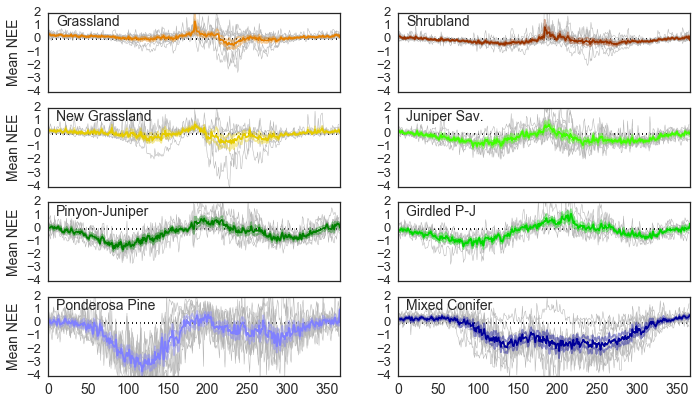

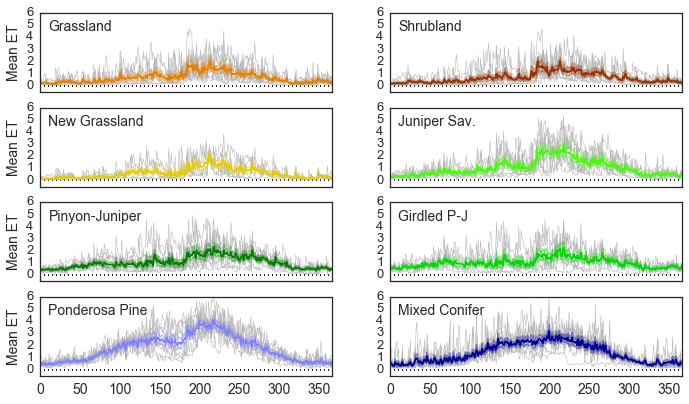

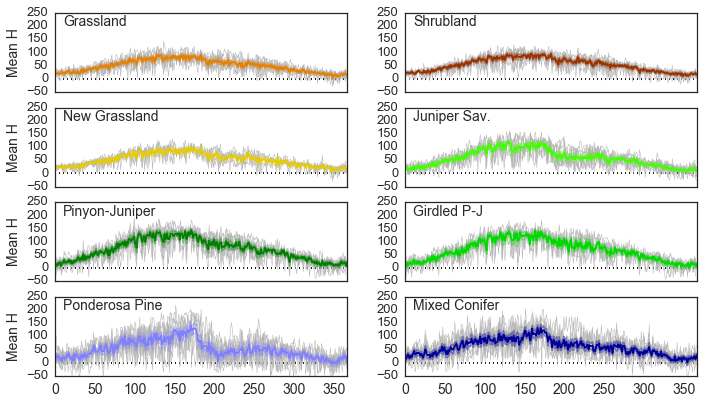

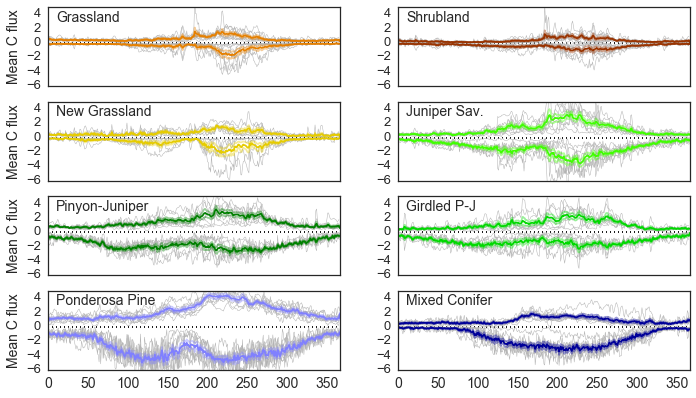

In [75]:
# Plot NEE
ylims = [ -4, 2 ]
xlims = [ 0, 366 ]
fig6 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( fc_clim, 'allyr_mean', 'NEE', 1, fig6, ind_yrs=True,
                        ylims=ylims)     
fig6.savefig( fig_path + 'NMEG_mean_NEE.svg')
fig6.savefig( fig_path + 'NMEG_mean_NEE.png', dpi=200)

ylims = [ -.5, 6 ]
fig7 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( et_clim, 'allyr_mean', 'ET', 4.5, fig7, ind_yrs=True,
                        ylims=ylims)     
# Commenting because it should look almost exacly the same shape as ET
#ylims = [ -5, 150 ]
#fig8 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
#plot_multiyr_mean_sites( le_clim, 'allyr_mean', 'LE', 100, fig8, ind_yrs=True,
#                        ylims=ylims)     

ylims = [ -50, 250 ]
fig9 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( h_clim, 'allyr_mean', 'H', 200, fig9, ind_yrs=True,
                        ylims=ylims)     

# Plot RECO and GPP
ylims = [ -6, 5 ]
fig10 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_multiyr_mean_sites( [re_clim, gpp_clim], 'allyr_mean', 'C flux', 3, fig10,
                        ylims=ylims, ind_yrs=True)
fig10.savefig( fig_path + 'NMEG_mean_RECOGPP.svg')
fig10.savefig( fig_path + 'NMEG_mean_RECOGPP.png', dpi=200)

## Cumulative sums by year

These show cumulative C flux (NEE or GPP) for each year measured.

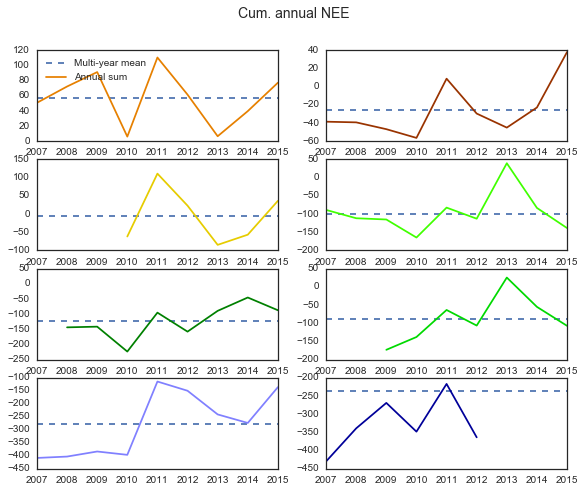

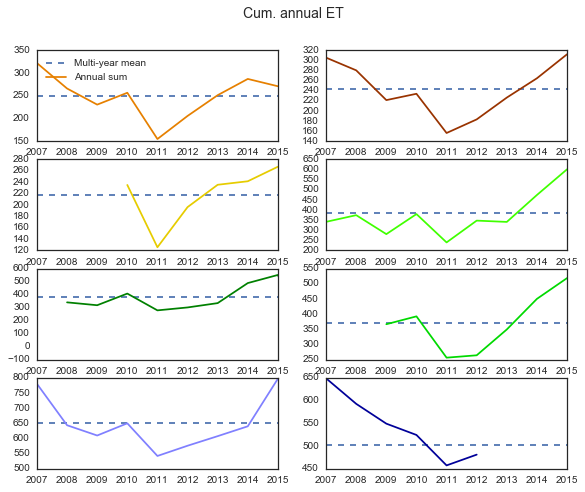

In [76]:
def plot_cumulative_annual( daily_var, clim, fig ):
    for i, site in enumerate(sites):
        ax = fig.add_subplot(len(sites)/2, 2, i+1)
        data = d[site][ daily_var ].groupby(d[site].index.year).sum()
        mean = clim[site].allyr_mean.sum()
        plt.plot([data.index[0], data.index[-1]], [mean, mean], ls='--')
        if site == 'Vcm':
            data = data[data.index < 2013]
        elif site == 'Mpj':
            data = data[data.index > 2007]  
        else:
            data = data[data.index < end+1]
        plt.plot(data.index, data, color=nmegplt.palette[site])
        
        if i == 0:
            plt.legend(['Multi-year mean', 'Annual sum'], loc='upper left')
        plt.xlim([start, end])
        x_formatter = mpl.ticker.ScalarFormatter(useOffset=False)
        ax.xaxis.set_major_formatter(x_formatter)
        #print(data.GPP_g_int.sum())

figX = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_annual( 'FC_F_g_int', fc_clim, figX )
plt.suptitle('Cum. annual NEE', size=14)

figZZ = plt.figure(figsize=( 9.5, 7.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_annual( 'ET_mm_24hint_0', et_clim, figZZ )
plt.suptitle('Cum. annual ET', size=14)

## Table of cumulative values

In [77]:
def climtable(clim, sitelist):
    # Make a table
    indices = ['2007', '2008', '2009', '2010', '2011', '2012', '2013',
               '2014', '2015', 'allyr_mean', 'allyr_stdev']
    tbl = pd.DataFrame(columns=sitelist, index = indices)
    # Sum up the climatology columns for the site
    for site in sitelist:
        sums = clim[site].sum()
        # Add each sum to correct site column
        for j in indices:
            tbl.loc[j, site] = sums[j]
    
    return tbl

nee_t = climtable(fc_clim, sites)
nee_t

,Seg,Ses,Sen,Wjs,Mpj,Mpg,Vcp,Vcm
2007,50.752,-38.4666,0,-88.6092,0,0,-408.243,-429.677
2008,72.2512,-39.2138,0,-111.502,-143.56,0,-402.926,-338.743
2009,91.2814,-46.6966,0,-114.925,-141.269,-173.007,-383.446,-268.917
2010,6.16041,-56.2854,-61.6386,-164.493,-223.405,-137.871,-396.272,-347.93
2011,110.504,8.82576,111.148,-82.2557,-95.0323,-63.5299,-114.272,-216.773
2012,61.5254,-29.5376,23.066,-112.766,-157.709,-106.398,-149.749,-363.522
2013,6.63731,-44.9694,-84.6501,39.6621,-89.1845,25.5181,-240.795,-112.636
2014,39.7778,-22.8646,-56.6644,-83.1093,-45.149,-55.021,-273.625,94.9486
2015,77.2772,38.0971,36.3786,-138.491,-87.2163,-107.094,-135.83,-144.665
allyr_mean,57.4223,-25.7437,-5.36149,-99.5031,-122.769,-87.8415,-277.541,-235.99


In [78]:
gpp_t = climtable(gpp_clim, sites)
gpp_t

,Seg,Ses,Sen,Wjs,Mpj,Mpg,Vcp,Vcm
2007,184.31,187.036,0,542.486,0,0,1077.89,694.563
2008,190.026,231.649,0,615.87,637.371,0,1108.71,618.077
2009,92.5818,181.288,0,404.567,577.682,529.249,1155.82,549.647
2010,155.472,168.015,260.93,546.517,796.49,621.248,1183.28,640.467
2011,61.6345,78.295,74.0396,354.22,576.479,355.373,883.45,528.038
2012,122.932,131.476,175.151,466.078,577.497,388.859,1035.72,597.139
2013,250.797,196.91,370.702,373.311,547.486,341.968,1048.42,634.308
2014,185.714,146.105,280.914,551.934,674.376,471.516,1049.82,202.132
2015,109.286,89.7977,173.784,759.088,700.947,600.49,1155.25,479.046
allyr_mean,150.379,156.842,222.615,524.491,636.362,472.682,1078.07,549.52


In [79]:
reco_t = climtable(re_clim, sites)
reco_t

,Seg,Ses,Sen,Wjs,Mpj,Mpg,Vcp,Vcm
2007,235.062,148.569,0,453.876,0,0,669.645,264.886
2008,262.277,192.435,0,504.368,493.811,0,705.789,279.335
2009,183.863,134.592,0,289.642,436.413,356.243,772.371,280.731
2010,161.632,111.73,199.292,382.024,573.085,483.377,787.009,292.536
2011,172.138,87.1208,185.187,271.964,481.447,291.844,769.178,311.265
2012,184.458,101.938,198.217,353.312,419.787,282.46,885.97,233.618
2013,257.435,151.941,286.052,412.973,458.301,367.486,807.622,521.671
2014,225.492,123.241,224.25,468.824,629.227,416.495,776.197,297.08
2015,186.564,127.895,210.163,620.596,613.731,493.396,1019.42,334.381
allyr_mean,207.801,131.098,217.254,424.988,513.593,384.841,800.527,313.531


## Cumulative NEE

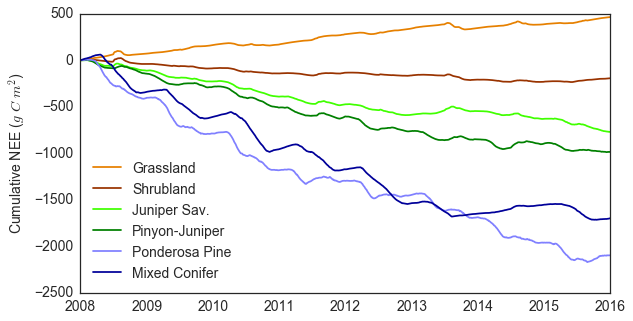

In [32]:
fig4 = plt.figure( figsize=( 9.5, 5 ), dpi=150, facecolor='w', edgecolor='k' )
var = 'FC_F_g_int'
ax = fig4.add_subplot(111)
idx = d.Seg.index.year > 2007
plt.plot( d.Seg[idx].index, d.Seg.loc[ idx, var ].cumsum(), color=nmegplt.palette['Seg'] )
idx = d.Ses.index.year > 2007
plt.plot( d.Ses[idx].index, d.Ses.loc[ idx, var ].cumsum(), color=nmegplt.palette['Ses'] )
idx = d.Wjs.index.year > 2007
plt.plot( d.Wjs[idx].index, d.Wjs.loc[ idx, var ].cumsum(), color=nmegplt.palette['Wjs'] )
idx = d.Mpj.index.year > 2007
plt.plot( d.Mpj[idx].index, d.Mpj.loc[ idx, var ].cumsum(), color=nmegplt.palette['Mpj'] )
idx = d.Vcp.index.year > 2007
plt.plot( d.Vcp[idx].index, d.Vcp.loc[ idx, var ].cumsum(),color=nmegplt.palette['Vcp'] )
#idx = np.logical_and( d.Vcm.index.year > 2007, d.Vcm.index.year < 2015 )
idx = d.Vcm.index.year > 2007
plt.plot( d.Vcm[idx].index, d.Vcm.loc[ idx, var ].cumsum(), color=nmegplt.palette['Vcm'] )
plt.ylabel(r'Cumulative NEE ($g\ C\ m^2$)', fontsize=14)
plt.setp( ax.get_yticklabels(), fontsize=14)
plt.setp( ax.get_xticklabels(), fontsize=14)
names = [nmegplt.longnames[x] for x in ['Seg','Ses','Wjs','Mpj','Vcp','Vcm']]
plt.legend( names, loc='lower left',
           fontsize=14)
plt.show()

fig4.savefig( fig_path + 'NMEG_allyr_cum_cflux.svg')
fig4.savefig( fig_path + 'NMEG_allyr_cum_cflux.png', dpi=200)

## Cumulative flux variability

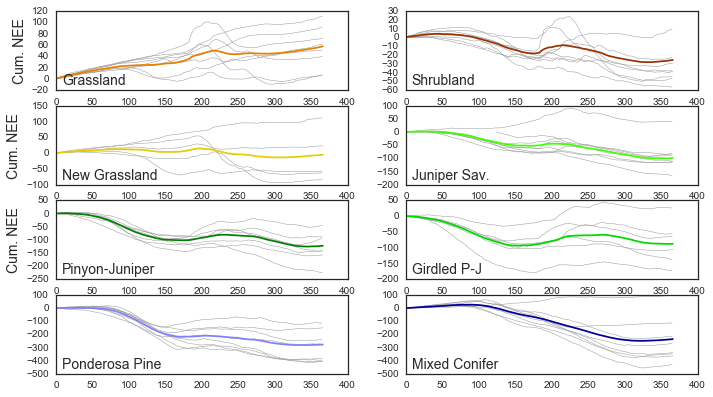

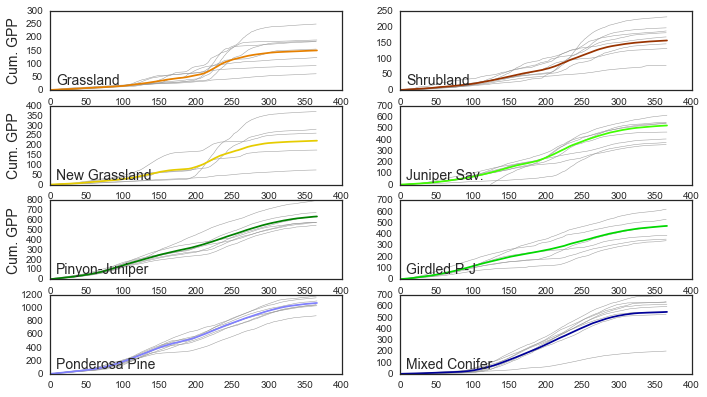

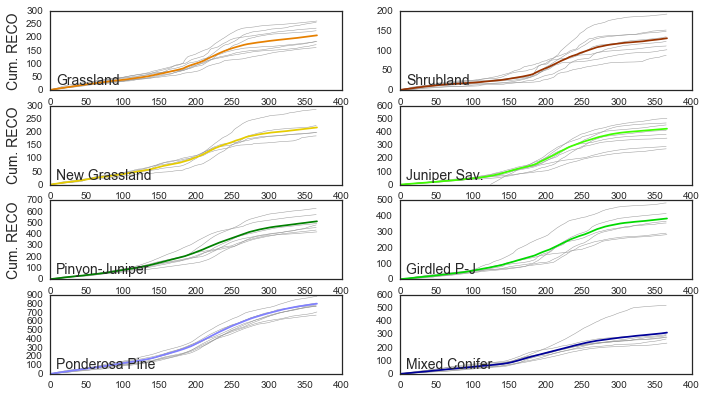

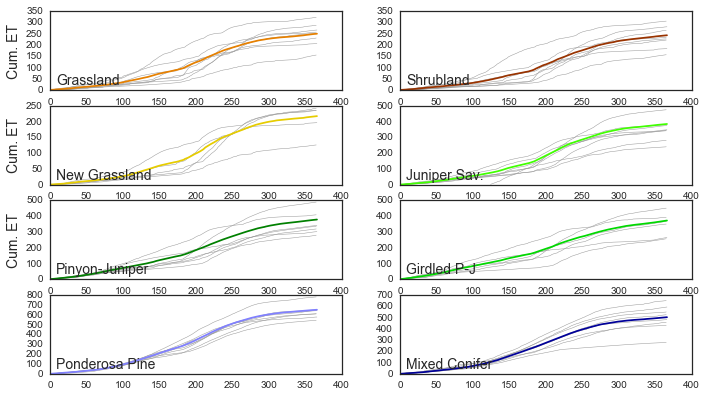

In [80]:
def plot_cumulative_flux( clim, fig, label ):
    ax = list();
    for i, site in enumerate(sites):
        ax.append(fig.add_subplot(len(sites)/2, 2, i+1))
        for j in range(start, end):
            sitedat = clim[site]
            plt.plot( sitedat.index,  np.cumsum(sitedat[str(j)]), color='0.6', lw=0.5)
        plt.plot( clim[site].index,  np.cumsum(clim[site].allyr_mean), color=nmegplt.palette[site])
            
        #plt.xlim( xlims )
        plt.text( .02, .07, nmegplt.longnames[site], size=14, transform=ax[i].transAxes )
        
    for i in (0, 2, 4):
            ax[i].set_ylabel('Cum. {0}'.format(label), fontsize=14)
            
figX = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( fc_clim, figX, 'NEE' )

figY = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( gpp_clim, figY, 'GPP' )

figZ = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( re_clim, figZ, 'RECO' )

figZZ = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( et_clim, figZZ, 'ET' )

## Opposing flux cumulative plots

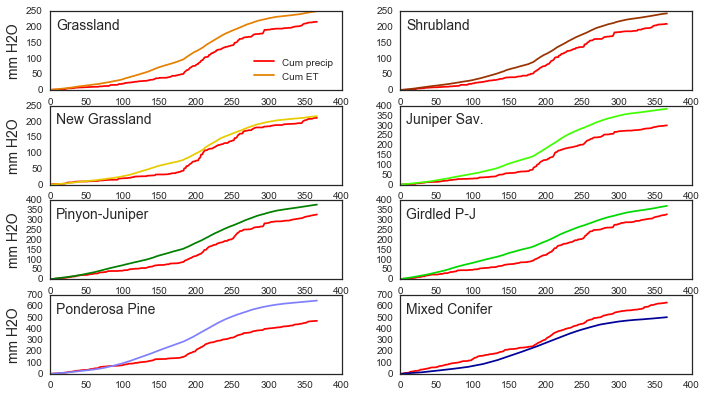

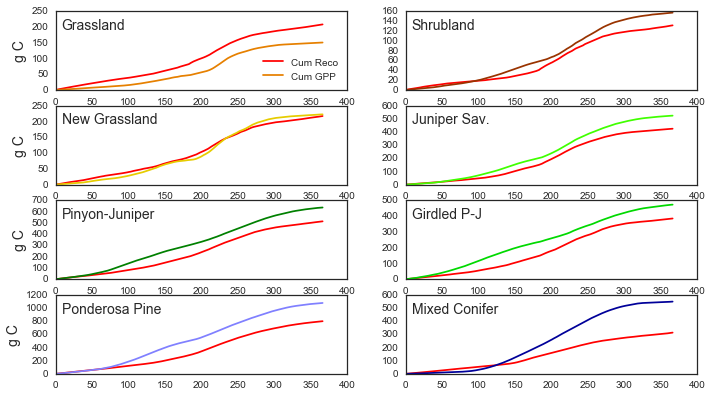

In [81]:
def plot_cumulative_flux( clim1, clim2, fig, label, legtxt ):
    ax = list();
    for i, site in enumerate(sites):
        ax.append(fig.add_subplot(len(sites)/2, 2, i+1))
        plt.plot( clim2[site].index,  np.cumsum(clim2[site].allyr_mean), color='red')
        plt.plot( clim1[site].index,  np.cumsum(clim1[site].allyr_mean), color=nmegplt.palette[site])
            
        #plt.xlim( xlims )
        plt.text( .02, .77, nmegplt.longnames[site], size=14, transform=ax[i].transAxes )
        if i==0:
            plt.legend(legtxt, loc='lower right')
    for i in range(0, len(sites), 2):
            ax[i].set_ylabel(label, fontsize=14)
            
figX = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( et_clim, p_clim, figX, 'mm H2O', ['Cum precip', 'Cum ET'])

figY = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
plot_cumulative_flux( gpp_clim, re_clim, figY, 'g C', ['Cum Reco', 'Cum GPP'] )